In [1]:
import cv2
import numpy as np
import time

In [2]:
def detectAndDisplay(frame):
    # 시작시간
    start_time = time.time()
    # pass the blob through the model and obtain the detections
    model = cv2.dnn.readNetFromCaffe(prototxt_name, model_name)
    
    # resize to 300x300 and then normalizing
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300,300)), 1.0, (300,300), (104.0, 177.0, 123.0))
    
    # 모델에 넣어준다.
    model.setInput(blob)
    
    # detection 결과
    detections = model.forward()
    
    #detection 결과 출력
    for i in range(0, detections.shape[2]):
        # 얼마나 가까운지에 대한 값(확신 정도)
        confidence = detections[0, 0, i, 2]
        # min_confidence = 0.5
        if confidence > min_confidence:
            (height, width) = frame.shape[:2]
            box = detections[0, 0, i, 3:7] * np.array([width, height, width, height])
            (startX, startY, endX, endY) = box.astype("int")
            print(confidence, startX, startY, endX, endY)
            # draw box and text
            text = "{:.2f}%".format(confidence*100)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
            cv2.putText(frame, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)
    # 종료시간
    end_time = time.time()
    # 경과시간
    process_time = end_time - start_time
    print("=== A frame took {:.3f} seconds".format(process_time))
    cv2.imshow("Face Det by dnn", frame)

In [3]:
# model(train 결과 모델 사용)
model_name = 'D:/opencv_dnn_202005/opencv_dnn_202005/res10_300x300_ssd_iter_140000.caffemodel'
# model 구조 확인
prototxt_name = 'D:/opencv_dnn_202005/opencv_dnn_202005/deploy.prototxt.txt'
min_confidence = 0.5
file_name = 'D:/opencv_dnn_202005/opencv_dnn_202005/video/obama_01.mp4'
# file_name = 'D:/opencv_dnn_202005/opencv_dnn_202005/image/img_100029.jpg'

#-- 2. Read the video stream
cap = cv2.VideoCapture(file_name)
if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)
while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break
    detectAndDisplay(frame)
    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

0.9927361 156 42 237 151
0.95661294 473 41 578 178
=== A frame took 0.143 seconds
0.992788 156 42 237 151
0.95721835 473 41 578 178
=== A frame took 0.059 seconds
0.9927695 156 42 237 151
0.9573465 473 41 578 178
=== A frame took 0.053 seconds
0.9927451 156 42 237 151
0.95722634 473 41 578 178
=== A frame took 0.053 seconds
0.99274665 156 42 237 151
0.9571711 473 41 578 178
=== A frame took 0.052 seconds
0.99274784 156 42 237 151
0.9572026 473 41 578 178
=== A frame took 0.054 seconds
0.9927443 156 42 237 151
0.95716923 473 41 578 178
=== A frame took 0.052 seconds
0.9927452 156 42 237 151
0.9571973 473 41 578 178
=== A frame took 0.054 seconds
0.99274665 156 42 237 151
0.95717335 473 41 578 178
=== A frame took 0.055 seconds
0.99274784 156 42 237 151
0.95719934 473 41 578 178
=== A frame took 0.053 seconds
0.9927443 156 42 237 151
0.95716375 473 41 578 178
=== A frame took 0.051 seconds
0.9927452 156 42 237 151
0.9571973 473 41 578 178
=== A frame took 0.076 seconds
0.99274665 156 42 

0.9836039 463 45 566 184
0.87516755 134 52 217 165
=== A frame took 0.052 seconds
0.9779017 465 45 567 183
0.8607729 134 52 217 165
=== A frame took 0.049 seconds
0.9762083 465 45 567 183
0.8610358 134 52 217 164
=== A frame took 0.051 seconds
0.9733652 465 45 567 183
0.8555129 134 52 217 164
=== A frame took 0.053 seconds
0.9733622 465 45 567 182
0.86375695 134 52 217 163
=== A frame took 0.054 seconds
0.97642285 465 45 567 183
0.8630574 134 52 216 163
=== A frame took 0.054 seconds
0.9775814 463 45 566 183
0.85897106 134 52 217 163
=== A frame took 0.059 seconds
0.97722715 463 45 566 183
0.85800266 134 52 216 162
=== A frame took 0.052 seconds
0.97663444 463 45 566 183
0.8214295 133 52 216 161
=== A frame took 0.051 seconds
0.9713199 464 45 566 182
0.7934698 133 52 216 161
=== A frame took 0.050 seconds
0.9682662 464 45 566 182
0.8419856 134 52 216 160
=== A frame took 0.055 seconds
0.967922 464 45 566 182
0.8003502 133 50 217 162
=== A frame took 0.055 seconds
0.9704934 465 45 565 1

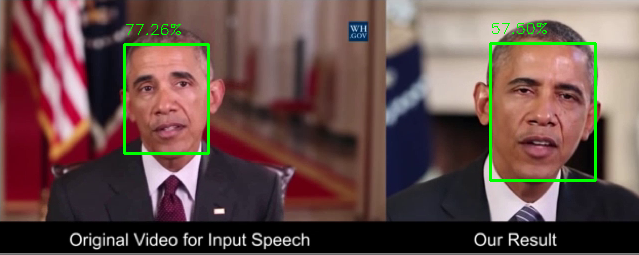